# **Data Scientist** 
En DataCompany queremos hacer crecer nuestro equipo con personas que tengan ganas de desarrollar 
software basado en datos con dos objetivos: ayudar en la transformación a nuestros clientes y disfrutar 
del proceso de crear valor a través de la tecnología.
 
Si quieres ser parte de un equipo que te ofrecerá retos tecnológicos y que te exigirá una mejora y 
aprendizaje continuo, si no tienes miedo a equivocarte y eres capaz de ser proactivo y tirar del carro 
cuando te toque, es posible que DataCompany sea el sitio donde deberías trabajar. ¿Te interesa? Echa un 
vistazo a nuestras vacantes en el equipo de Data Science. 

**¿Sabes lo que vas a hacer además?**

El objetivo del proyecto junto con el del equipo es realizar el desarrollo, entrenamiento y 
productivización de modelos para dar respuesta a necesidades de negocio del cliente. Todos los casos de 
uso que se llevarán a cabo estarán desarrollados en Cloud (AWS). 

**Requisitos:**

- Mínimo 1 años de experiencia en en el desarrollo de piezas de Machine Learning así como 
en su implementación en entornos de nube pública 
- Programación en Python y/o R 
- Manejo de librerías de análisis, modelado y visualización de datos. 
- Conocimientos y experiencia trabajando con deep learning, especialmente NLP 
- Fuerte base en estadística. 
- Conocimientos en Git. 
- Capacidad de síntesis y habilidades comunicativas en presentaciones. 

**También es deseable:**

- Experiencia en despliegue de modelos en producción  
- Inglés nivel B2-C1. 
- Experiencia y entusiasmo por trabajar con metodologías ágiles (Scrum, Kanban...). 
¿Qué te ofrecemos en DataCompany? 
- Un buen ambiente de trabajo junto a compañeros que son unos cracks en sus tecnologías y 
de los que aprenderás cada día. 
- Tendrás un presupuesto personal anual de 2.000 euros para que lo dediques a la formación 
elegida por ti, adicional a cubrir el coste de tus certificaciones. 
- Horario flexible, así como teletrabajo y flexibilidad en el almuerzo, para que tu vida 
personal y profesional encajen sin problema. 
- Jornada intensiva los viernes todo el año, y los meses de julio y agosto. 
- Retribución flexible para tarjeta transporte, seguro médico para familiares y cheque 
guardería. 
- Tu evaluación y subida salarial la realizarán tus compañeros, nada de jefes porque aquí no 
encontrarás ninguno. 

# **PRUEBA TÉCNICA** 

Para evaluar tus conocimientos técnicos, en esta fase del proceso de selección tendrás que realizar un ejercicio práctico del que dispondrás hasta el lunes 11 donde se dará lugar a la entrevista individual. 

**Caso de uso** 

Tenemos el caso de uso de un cliente (@TheBridge_Tech) que desea desarrollar una monitorización de las redes sociales para medir el impacto de su marca y acciones 
comerciales. 

Tendrás que realizar las siguientes tareas: 

1. Recopilar los tweets donde se mencione la cuenta de @TheBridge_Tech desde el día que comenzaste el bootcamp (19 Septiembre) hasta el último día de clase (05 Diciembre). Se recomienda utilizar la API v2 de Twitter. Se deberá recoger: 

    a. Id del mensaje 

    b. Cuerpo del texto del mensaje 

    c. Fecha del tweet 

    d. Id del autor 
    
    e. Nombre del autor 

    f. Nombre de usuario del autor 

    g. Métricas públicas del tweet (retweet, reply, like, quote) 

2. Almacenarlos en una base de datos SQL en 2 tablas normalizadas: (tweets, usuarios) 

3. Realizar un pequeño análisis donde se respondan a las siguientes preguntas de negocio: 

    a. ¿Cuál es el tweet con mayor repercusión social? 

    b. ¿Cuál es el usuario que más menciona a la escuela? 
    
    c. ¿En qué mes se concentra el mayor número de tweets? 

    d. ¿Qué palabras son más frecuentes? 

    e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas? 
    
    f. ¿Has sacado alguna conclusión extra en tu análisis? 

4. Utiliza el modelo pre entrenado que se te ha facilitado de análisis de sentimientopara determinar el sentimiento de los tweets. Preguntas: 

    a. ¿Cuáles son las predicciones? Interpreta los resultados. 

    b. ¿Qué variables son las más importantes del modelo? 
    
    c. ¿Cómo podrías mejorar el modelo? 
    
    d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML? 

5. Realizar una presentación de 5 minutos máximo, donde presentes tu solución y la defiendas en una entrevista personal. 

Las herramientas o recursos que necesites para el desarrollo de la prueba técnica quedan a tu elección. Deberás subir tanto tu código como la presentación a un repositorio de Git. 

---

# **PRUEBA TECNICA**

## ***1. Recopilar Tweets***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

import spacy
from collections import Counter
import re

In [2]:
df_old = pd.read_csv('./tweets_older.csv')
df_old.head(3)

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Replies
0,0,2022-05-19 15:39:16+00:00,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,1,2022-05-18 15:23:22+00:00,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2,2022-05-18 11:26:31+00:00,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0


In [3]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  134 non-null    int64 
 1   Date        134 non-null    object
 2   User        134 non-null    object
 3   Tweet       134 non-null    object
 4   Likes       134 non-null    int64 
 5   Retweets    134 non-null    int64 
 6   Replies     134 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 7.5+ KB


In [4]:
df_old_f = df_old.drop(columns=['Unnamed: 0'])
df_old_f.head()

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16+00:00,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,2022-05-18 15:23:22+00:00,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2022-05-18 11:26:31+00:00,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,2022-05-18 08:31:13+00:00,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,2022-05-17 14:53:47+00:00,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0


In [5]:
df_old_f['Date'] = df_old_f['Date'].str.replace(r'\+00:00$', '', regex=True)
df_old_f['Date'] = pd.to_datetime(df_old_f['Date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
print(df_old_f.head(1))
df_old_f.info()

                 Date            User  \
0 2022-05-19 15:39:16  TheBridge_Tech   

                                               Tweet  Likes  Retweets  Replies  
0  ¡Qué poco queda para el próximo 🔥Burn Monday🔥!...      0         2        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      134 non-null    datetime64[ns]
 1   User      134 non-null    object        
 2   Tweet     134 non-null    object        
 3   Likes     134 non-null    int64         
 4   Retweets  134 non-null    int64         
 5   Replies   134 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.4+ KB


In [7]:
df_new_1 = pd.read_csv('./tweets_newer.csv')
df_new_1.head(3)

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1
1,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1,0
2,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10,0


In [8]:
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 143 non-null    int64 
 1   contenido          143 non-null    object
 2   fecha_publicacion  143 non-null    object
 3   usuario_id         143 non-null    int64 
 4   retweets           143 non-null    int64 
 5   replies            143 non-null    int64 
 6   likes              143 non-null    int64 
 7   quotes             143 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 9.1+ KB


In [9]:
df_new_2 = pd.read_csv('./users.csv')
df_new_2.head(3)

,id,nombre,nombre_usuario
0,987047282,A3Sec,a3sec
1,1162694149956603904,The Bridge,TheBridge_Tech
2,41545659,Mario Lopez de Avila,nodosenlared


In [10]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              143 non-null    int64 
 1   nombre          143 non-null    object
 2   nombre_usuario  143 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


In [11]:
df_new_1[df_new_1['usuario_id']==987047282]


,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
142,1659514560200470559,Ayer visitamos a los alumnos de @TheBridge_Tec...,2023-05-19 11:01:18,987047282,1,0,3,1


df_new_1['usuario_id'] == df_new_2['id']

pd.merge(frame_1, frame_2, left_on='county_ID', right_on='countyid')

In [12]:
print("Duplicados en df_new_1:", df_new_2['id'].duplicated().sum())


Duplicados en df_new_1: 105


In [13]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              143 non-null    int64 
 1   nombre          143 non-null    object
 2   nombre_usuario  143 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


In [14]:
df_new_1['contenido'].iloc[9]

'@42UrdulizFTef @EstiLeon @workinlansummit @TheBridge_Tech @BBK_eus Hoy finaliza #WORKinlan y lo hace ya con una buena participación en Twitter y eso que aún queda todo el día de hoy 💪 https://t.co/54lcCbyUGi'

In [15]:
df_new_1['contenido'].iloc[10]

'@42UrdulizFTef @EstiLeon @workinlansummit @TheBridge_Tech @BBK_eus @PSEBizkaia @josebamondarain @grupo_ssi @socialistavasco @PSEBilbao @MtzGra @elcorreo_alava @elcorreo_com Muy buenas interacciones están teniendo las comunidades de las siguientes cuentas que copan el TOP 12 del #WORKinlan 🏆 https://t.co/g8SdZl1vL2'

In [16]:
df_new_1.head(10)

,id,contenido,fecha_publicacion,usuario_id,retweets,replies,likes,quotes
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1
1,1625165984414695426,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,2023-02-13 16:12:19,1162694149956603904,2,0,1,0
2,1625813763751305216,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-02-15 11:06:22,1530194743786881024,2,1,10,0
3,1625825721862987777,@BitcoinTuesday_ ¡Un placer!,2023-02-15 11:53:53,1162694149956603904,0,0,2,0
4,1625828554691805187,¿Los colores tienen género?¿podemos hacer una ...,2023-02-15 12:05:08,1162694149956603904,2,1,2,0
5,1625882688023416833,¿Te animas a crear un videojuego con programac...,2023-02-15 15:40:14,1162694149956603904,3,0,2,0
6,1626101043908993026,@TheBridge_Tech @Vacolba @andresmacariog inter...,2023-02-16 06:07:55,1099588676181471233,0,0,1,0
7,1626157411085033472,Buenos días CPSers!\nHoy podemos confirmar que...,2023-02-16 09:51:54,1003872445,0,1,4,0
8,1626267048434192385,".@EstiLeon, Responsable del campus #42UrdulizF...",2023-02-16 17:07:33,1288769305014939650,5,1,10,0
9,1626573019844907008,@42UrdulizFTef @EstiLeon @workinlansummit @The...,2023-02-17 13:23:22,1685197165,0,1,0,0


In [17]:
df_new_2.head(10)

,id,nombre,nombre_usuario
0,987047282,A3Sec,a3sec
1,1162694149956603904,The Bridge,TheBridge_Tech
2,41545659,Mario Lopez de Avila,nodosenlared
3,1162694149956603904,The Bridge,TheBridge_Tech
4,1162694149956603904,The Bridge,TheBridge_Tech
5,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
6,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
7,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
8,41545659,Mario Lopez de Avila,nodosenlared
9,1162694149956603904,The Bridge,TheBridge_Tech


In [18]:
print("Duplicados en df_new_2:", df_new_2['id'].duplicated().sum())

Duplicados en df_new_2: 105


Observamos que tenemos muestras duplicadas en df_new_2 por lo que las vamos a eliminar con el codigo de la celda de abajo.

In [19]:
# Eliminar duplicados en df_new_2
df_new_2 = df_new_2.drop_duplicates(subset='id')

# Realizar el merge nuevamente
df_new_merged = pd.merge(df_new_1, df_new_2, left_on='usuario_id', right_on='id', how='left')

In [20]:
df_new_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_x               143 non-null    int64 
 1   contenido          143 non-null    object
 2   fecha_publicacion  143 non-null    object
 3   usuario_id         143 non-null    int64 
 4   retweets           143 non-null    int64 
 5   replies            143 non-null    int64 
 6   likes              143 non-null    int64 
 7   quotes             143 non-null    int64 
 8   id_y               143 non-null    int64 
 9   nombre             143 non-null    object
 10  nombre_usuario     143 non-null    object
dtypes: int64(7), object(4)
memory usage: 12.4+ KB


df.rename(columns={"A": "a", "B": "c"})


In [21]:
df_new_m_fin = df_new_merged.rename(columns={'usuario_id': 'ID_User'})
df_new_m_fin.head(1)

,id_x,contenido,fecha_publicacion,ID_User,retweets,replies,likes,quotes,id_y,nombre,nombre_usuario
0,1625126689150738438,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,1,4899284631,My Tech Plan,my_tech_plan


In [22]:
# Dropeamos columans
df_new_m_fin = df_new_m_fin.drop(columns=['id_x', 'quotes', 'id_y'])
df_new_m_fin.head(1)

,contenido,fecha_publicacion,ID_User,retweets,replies,likes,nombre,nombre_usuario
0,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,My Tech Plan,my_tech_plan


In [23]:
# Renombramos las columnas
df_new_m_fin = df_new_m_fin.rename(columns={'contenido': 'Tweet', 'fecha_publicacion': 'Date', 'likes': 'Likes', 'replies': 'Replies', 'retweets': 'Retweets', 'nombre_usuario': 'User'})
df_new_m_fin.head(1)

,Tweet,Date,ID_User,Retweets,Replies,Likes,nombre,User
0,Les compartimos un mini resumen del 1º encuent...,2023-02-13 13:36:10,4899284631,0,0,2,My Tech Plan,my_tech_plan


In [24]:
df_old_f.head(1)

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0


In [25]:
nuevo_orden = ['Date', 'User', 'Tweet', 'Likes', 'Retweets', 'Replies']

In [26]:
df_new_m_fin = df_new_m_fin[nuevo_orden]

In [27]:
df_new_m_fin.head(1)

,Date,User,Tweet,Likes,Retweets,Replies
0,2023-02-13 13:36:10,my_tech_plan,Les compartimos un mini resumen del 1º encuent...,2,0,0


In [28]:
df_new_m_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      143 non-null    object
 1   User      143 non-null    object
 2   Tweet     143 non-null    object
 3   Likes     143 non-null    int64 
 4   Retweets  143 non-null    int64 
 5   Replies   143 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 6.8+ KB


In [29]:
df_new_merged.shape

(143, 11)

In [30]:
print(df_new_merged.head())


                  id_x                                          contenido  \
0  1625126689150738438  Les compartimos un mini resumen del 1º encuent...   
1  1625165984414695426  ¡Nos vamos al WorkinLan Workshop en Bilbao jun...   
2  1625813763751305216  Gracias a nuestros amigos @TheBridge_Tech por ...   
3  1625825721862987777                       @BitcoinTuesday_ ¡Un placer!   
4  1625828554691805187  ¿Los colores tienen género?¿podemos hacer una ...   

     fecha_publicacion           usuario_id  retweets  replies  likes  quotes  \
0  2023-02-13 13:36:10           4899284631         0        0      2       1   
1  2023-02-13 16:12:19  1162694149956603904         2        0      1       0   
2  2023-02-15 11:06:22  1530194743786881024         2        1     10       0   
3  2023-02-15 11:53:53  1162694149956603904         0        0      2       0   
4  2023-02-15 12:05:08  1162694149956603904         2        1      2       0   

                  id_y           nombre   nombre_u

In [31]:
df_old_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      134 non-null    datetime64[ns]
 1   User      134 non-null    object        
 2   Tweet     134 non-null    object        
 3   Likes     134 non-null    int64         
 4   Retweets  134 non-null    int64         
 5   Replies   134 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.4+ KB


In [32]:
df_new_m_fin['Date'] = pd.to_datetime(df_new_m_fin['Date'], format='%Y-%m-%d %H:%M:%S')

In [33]:
df_new_m_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      143 non-null    datetime64[ns]
 1   User      143 non-null    object        
 2   Tweet     143 non-null    object        
 3   Likes     143 non-null    int64         
 4   Retweets  143 non-null    int64         
 5   Replies   143 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.8+ KB


In [34]:
print(df_old_f.head(1))
print(df_new_m_fin.head(1))

                 Date            User  \
0 2022-05-19 15:39:16  TheBridge_Tech   

                                               Tweet  Likes  Retweets  Replies  
0  ¡Qué poco queda para el próximo 🔥Burn Monday🔥!...      0         2        0  
                 Date          User  \
0 2023-02-13 13:36:10  my_tech_plan   

                                               Tweet  Likes  Retweets  Replies  
0  Les compartimos un mini resumen del 1º encuent...      2         0        0  


In [35]:
print(df_old_f.info())
print(df_new_m_fin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      134 non-null    datetime64[ns]
 1   User      134 non-null    object        
 2   Tweet     134 non-null    object        
 3   Likes     134 non-null    int64         
 4   Retweets  134 non-null    int64         
 5   Replies   134 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      143 non-null    datetime64[ns]
 1   User      143 non-null    object        
 2   Tweet     143 non-null    object        
 3   Likes     143 non-null    int64         
 4   Retweets  143 non-null    int64         
 5   Replies   143 non-null 

In [36]:
df_twitter = pd.concat([df_old_f, df_new_m_fin])
print(df_twitter.head(1))
print(df_twitter.tail(1))

                 Date            User  \
0 2022-05-19 15:39:16  TheBridge_Tech   

                                               Tweet  Likes  Retweets  Replies  
0  ¡Qué poco queda para el próximo 🔥Burn Monday🔥!...      0         2        0  
                   Date   User  \
142 2023-05-19 11:01:18  a3sec   

                                                 Tweet  Likes  Retweets  \
142  Ayer visitamos a los alumnos de @TheBridge_Tec...      3         1   

     Replies  
142        0  


In [37]:
df_twitter.head(1)

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0


In [38]:
df_twitter

,Date,User,Tweet,Likes,Retweets,Replies
0,2022-05-19 15:39:16,TheBridge_Tech,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,2022-05-18 15:23:22,TheBridge_Tech,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,2022-05-18 11:26:31,TheBridge_Tech,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,2022-05-18 08:31:13,Bcasapp,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,2022-05-17 14:53:47,TheBridge_Tech,¿Con ganas de probar si un empleo tecnológico ...,2,2,0
...,...,...,...,...,...,...
138,2023-05-16 11:15:34,TheBridge_Tech,Así es el #bootcamp de #UXUIProductDesign que ...,3,1,0
139,2023-05-17 11:06:23,TheBridge_Tech,Nos colamos en el campus de #Bilbao para descu...,2,1,0
140,2023-05-17 13:21:52,nodosenlared,"#MLMonitoring and #Observability, mar, 23 may ...",3,1,0
141,2023-05-18 10:00:23,TheBridge_Tech,¿Qué hacían nuestros alumni antes del #bootcam...,0,0,0


In [39]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      277 non-null    datetime64[ns]
 1   User      277 non-null    object        
 2   Tweet     277 non-null    object        
 3   Likes     277 non-null    int64         
 4   Retweets  277 non-null    int64         
 5   Replies   277 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.1+ KB


In [40]:
df_new_m_fin.head()

,Date,User,Tweet,Likes,Retweets,Replies
0,2023-02-13 13:36:10,my_tech_plan,Les compartimos un mini resumen del 1º encuent...,2,0,0
1,2023-02-13 16:12:19,TheBridge_Tech,¡Nos vamos al WorkinLan Workshop en Bilbao jun...,1,2,0
2,2023-02-15 11:06:22,BitcoinTuesday_,Gracias a nuestros amigos @TheBridge_Tech por ...,10,2,1
3,2023-02-15 11:53:53,TheBridge_Tech,@BitcoinTuesday_ ¡Un placer!,2,0,0
4,2023-02-15 12:05:08,TheBridge_Tech,¿Los colores tienen género?¿podemos hacer una ...,2,2,1


In [41]:
print("Duplicados en df_new_2:", df_twitter['Date'].duplicated().sum())

Duplicados en df_new_2: 2


In [42]:
# Identificar todas las instancias duplicadas en la columna 'Date'
duplicados = df_twitter[df_twitter['Date'].duplicated(keep=False)]

# Imprimir las muestras duplicadas
print(duplicados)


                   Date      User  \
22  2023-03-06 10:38:30  ESOLIUPO   
23  2023-03-06 10:38:30  ESOLIUPO   
135 2023-05-15 20:44:05  ESOLIUPO   
136 2023-05-15 20:44:05  ESOLIUPO   

                                                 Tweet  Likes  Retweets  \
22   ¡Por fin podemos publicar el cartel con los po...      5         3   
23   Las inscripciones se realizarán por Eventbrite...      0         0   
135  ¡¡Recuerda que todavía siguen las entradas par...      4         4   
136  Si todavía no has pillado las entradas (que so...      1         0   

     Replies  
22         1  
23         0  
135        1  
136        1  


In [43]:
df_usuarios = df_twitter[['User']].drop_duplicates().reset_index(drop=True)
df_usuarios['user_id'] = df_usuarios.index + 1 # Creamos un ID de usuario único

In [44]:
df_usuarios

,User,user_id
0,TheBridge_Tech,1
1,Bcasapp,2
2,PdelaPublicidad,3
3,arey,4
4,Alberto_Blanco,5
...,...,...
90,EDEMempresarios,91
91,ProductoActual1,92
92,jorgegrev,93
93,Madrid4Refugees,94


In [45]:
nuevo_orden = ['user_id', 'User']
df_usuarios = df_usuarios[nuevo_orden]

In [46]:
# Mapear 'User' a 'user_id'
user_id_map = df_usuarios.set_index('User')['user_id'].to_dict()
df_twitter['user_id'] = df_twitter['User'].map(user_id_map)

# Creamos el DataFrame df_tweets con la estructura deseada
df_tweets = df_twitter[['user_id', 'Date', 'Tweet', 'Likes', 'Retweets', 'Replies']]

In [47]:
df_tweets

,user_id,Date,Tweet,Likes,Retweets,Replies
0,1,2022-05-19 15:39:16,¡Qué poco queda para el próximo 🔥Burn Monday🔥!...,0,2,0
1,1,2022-05-18 15:23:22,Esta es la historia de Isis🤗 que decidió hacer...,0,0,0
2,1,2022-05-18 11:26:31,Gracias @victorianoI y equipo por el análisis ...,0,0,0
3,2,2022-05-18 08:31:13,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,8,4,1
4,1,2022-05-17 14:53:47,¿Con ganas de probar si un empleo tecnológico ...,2,2,0
...,...,...,...,...,...,...
138,1,2023-05-16 11:15:34,Así es el #bootcamp de #UXUIProductDesign que ...,3,1,0
139,1,2023-05-17 11:06:23,Nos colamos en el campus de #Bilbao para descu...,2,1,0
140,34,2023-05-17 13:21:52,"#MLMonitoring and #Observability, mar, 23 may ...",3,1,0
141,1,2023-05-18 10:00:23,¿Qué hacían nuestros alumni antes del #bootcam...,0,0,0


---

## ***2. Bases de Datos SQL***

### 1. Conexión a SQLite

In [48]:
# Conexión a SQLite
conn = sqlite3.connect('twitter.db')

### 2. Creación de Tablas

In [210]:
# Creamos tabla 'usuarios'
conn.execute('''
CREATE TABLE IF NOT EXISTS usuarios (
    user_id INTEGER PRIMARY KEY,
    user_name TEXT
)
''')

# Creamos la tabla 'tweets'
conn.execute('''
CREATE TABLE IF NOT EXISTS tweets (
    tweet_id INTEGER PRIMARY KEY AUTOINCREMENT,
    user_id INTEGER,
    date DATETIME,
    likes INTEGER,
    retweets INTEGER,
    replies INTEGER,
    FOREIGN KEY (user_id) REFERENCES usuarios (user_id)
)
''')

conn.commit()

### 3. Insercción de Datos:

In [211]:
# Insertamos datos en la tabla 'usurarios'
df_usuarios.to_sql('usuarios', con=conn, if_exists='replace', index=False)

# Insertamos datos en la tabla 'tweets'
df_tweets.to_sql('tweets', con=conn, if_exists='replace', index=False)

277

---

## ***3. Análisis de Datos***

### 4. Queries

In [49]:
# Vamos hacer una consulta de prueba
cursor = conn.cursor()
cursor.execute("""
               SELECT * FROM usuarios
               LIMIT 5
               """)
print(cursor.fetchall())

[(1, 'TheBridge_Tech'), (2, 'Bcasapp'), (3, 'PdelaPublicidad'), (4, 'arey'), (5, 'Alberto_Blanco')]


##### **a. ¿Cuál es el tweet con mayor repercusión social?**

In [50]:
query = '''
SELECT *, (Likes + Retweets + Replies) AS Repercusion
FROM tweets
ORDER BY Repercusion DESC
LIMIT 1;
'''
resultado = conn.execute(query).fetchone()
print(resultado)

(66, '2023-04-09 23:06:36', 'Para reactivarse!!!\nTenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech\n\n@dev7ba nos hablará sobre la mempool!!\nCharla para todo el mundo, sepas o no sobre #Bitcoin \n\n@GaboHBeaumont @kilrau @libertariadora @olya_borderless\nhttps://t.co/bHzpDduIRo\n\nSe agradece RT', 39, 25, 3, 67)


#### **b. ¿Cuál es el usuario que más menciona a la escuela?**

In [56]:
# Ejecutar la consulta SQL
query = '''
SELECT user_id, COUNT(*) AS NumMenciones
FROM tweets
WHERE Tweet LIKE '%TheBridge_Tech%'
GROUP BY user_id
ORDER BY NumMenciones DESC
LIMIT 1;
'''
resultado = conn.execute(query).fetchone()
print(f"Usuario que más menciona a la escuela: {resultado[0]}")


Usuario que más menciona a la escuela: 71


In [61]:
query = '''
SELECT usuarios.user, COUNT(tweets.tweet) AS NumMenciones
FROM tweets
JOIN usuarios ON tweets.user_id = usuarios.user_id
WHERE tweets.Tweet LIKE '%TheBridge_Tech%'
GROUP BY tweets.user_id
ORDER BY NumMenciones DESC
LIMIT 1;
'''
resultado = conn.execute(query).fetchone()
print(f"Usuario que más menciona a TheBridge_Tech: {resultado[0]} con {resultado[1]} menciones")


Usuario que más menciona a TheBridge_Tech: DatabeerSVQ con 17 menciones


#### **d. ¿En qué mes se concentra el mayor número de tweets?**

In [62]:
query = '''
SELECT strftime('%Y-%m', date) AS Mes, COUNT(*) AS NumeroDeTweets
FROM tweets
GROUP BY Mes
ORDER BY NumeroDeTweets DESC
LIMIT 1;
'''
mes_con_mas_tweets = conn.execute(query).fetchone()
print(f"El mes con mayor número de tweets es: {mes_con_mas_tweets[0]} con {mes_con_mas_tweets[1]} tweets")


El mes con mayor número de tweets es: 2023-03 con 73 tweets


In [63]:
query = '''
SELECT strftime('%Y-%m', date) AS Mes, COUNT(*) AS NumeroDeTweets
FROM tweets
WHERE strftime('%Y', date) IN ('2022', '2023')
GROUP BY Mes
ORDER BY Mes;
'''
resultados = conn.execute(query).fetchall()

# Imprimir los resultados
for mes, num_tweets in resultados:
    print(f"Mes: {mes}, Número de Tweets: {num_tweets}")


Mes: 2022-01, Número de Tweets: 17
Mes: 2022-02, Número de Tweets: 23
Mes: 2022-03, Número de Tweets: 27
Mes: 2022-04, Número de Tweets: 49
Mes: 2022-05, Número de Tweets: 18
Mes: 2023-02, Número de Tweets: 13
Mes: 2023-03, Número de Tweets: 73
Mes: 2023-04, Número de Tweets: 38
Mes: 2023-05, Número de Tweets: 19


In [64]:
# Ejecutar la consulta
query = '''
SELECT strftime('%m', date) AS Mes, COUNT(*) AS NumeroDeTweets
FROM tweets
WHERE strftime('%Y', date) IN ('2022', '2023')
GROUP BY Mes
ORDER BY NumeroDeTweets DESC
LIMIT 1;
'''
mes_con_mas_tweets = conn.execute(query).fetchone()
print(f"El mes con mayor número de tweets (considerando 2022 y 2023) es: {mes_con_mas_tweets[0]} con {mes_con_mas_tweets[1]} tweets")


El mes con mayor número de tweets (considerando 2022 y 2023) es: 03 con 100 tweets


##### **d. ¿Qué palabras son más frecuentes?**

In [219]:
# Cargar el modelo de spaCy
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo (reemplazar con tus tweets)
texto = " ".join(df_tweets['Tweet'])

# Limpiar el texto
texto_limpio = re.sub(r'\W+', ' ', texto.lower())

# Procesar el texto con spaCy
doc = nlp(texto_limpio)

# Filtrar stopwords y puntuación, y contar palabras
palabras = [token.text for token in doc if not token.is_stop and not token.is_punct]
frecuencias = Counter(palabras)
print(frecuencias.most_common(10))


[('t', 302), ('co', 300), ('https', 299), ('thebridge_tech', 194), ('bootcamp', 36), ('gracias', 36), ('digital', 33), ('entradas', 32), ('sngular', 27), ('madrid', 26)]


Vamos a limpiar un poco más el texto.

In [65]:
# Cargar el modelo de spaCy
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo (reemplazar con tus tweets)
texto = " ".join(df_tweets['Tweet'])

# Limpiar el texto (elimina URLs y caracteres no alfanuméricos)
texto_limpio = re.sub(r'http\S+', '', texto)
texto_limpio = re.sub(r'\W+', ' ', texto_limpio.lower())

# Procesar el texto con spaCy
doc = nlp(texto_limpio)

# Palabras no deseadas adicionales
palabras_no_deseadas = {'t', 'co'}

palabras_filtradas = []

# Recorremos cada token en el documento procesado
for token in doc:
    # Verificamos se el token es una stopword, puntución o palabra no deseada
    if not token.is_stop and not token.is_punct and token.text not in palabras_no_deseadas:
        # Agregamos el texto del token a la lista de palabras filtradas
        palabras_filtradas.append(token.text)

# Contamos la frecuancia de cada palabra en la lista filtrada
frecuencias = Counter(palabras_filtradas)

# Imprimimos las 10 palabras más comunes
print(frecuencias.most_common(10))

[('thebridge_tech', 194), ('bootcamp', 36), ('gracias', 36), ('digital', 33), ('entradas', 32), ('sngular', 27), ('madrid', 26), ('19', 26), ('sevilla', 25), ('datascience', 23)]


In [63]:
# Suponiendo que 'frecuencias' es tu objeto Counter
palabras_mas_comunes = frecuencias.most_common(10)

# Separar palabras y sus frecuencias
palabras = [item[0] for item in palabras_mas_comunes]  # Nombres de las palabras
conteos = [item[1] for item in palabras_mas_comunes]

print(palabras)
print(conteos)

['thebridge_tech', 'bootcamp', 'gracias', 'digital', 'entradas', 'sngular', 'madrid', '19', 'sevilla', 'datascience']
[194, 36, 36, 33, 32, 27, 26, 26, 25, 23]


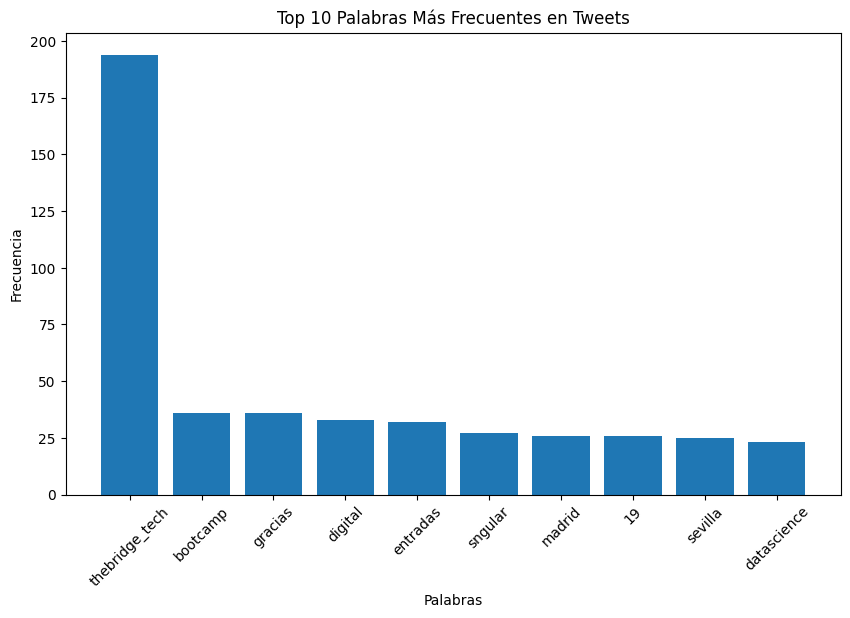

In [64]:
# Configurar las dimensiones y el estilo del gráfico
plt.figure(figsize=(10, 6))
plt.bar(palabras, conteos)

# Añadir títulos y etiquetas
plt.title('Top 10 Palabras Más Frecuentes en Tweets')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X en 45 grados
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

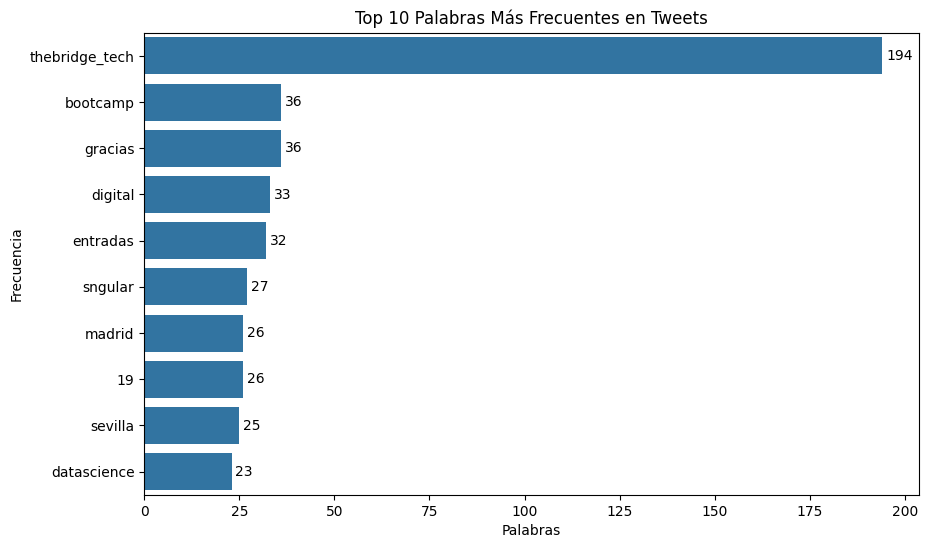

In [235]:
# Creamos DataFrame para Seaborn
data = pd.DataFrame({'Palabras': palabras, 'Frecuencia': conteos})

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Frecuencia', y='Palabras', data=data)

# Añadimos títulos y etiquetas
plt.title('Top 10 Palabras Más Frecuentes en Tweets')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

# Añadimos el conteo en las barras
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 1,
             p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width),
             ha = 'left',
             va = 'center')
            
plt.show()

##### **e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?**

In [48]:
# Matriz de correlación por consola
matriz_correlacion = df_tweets[['Likes', 'Retweets', 'Replies']].corr()
print(matriz_correlacion)

             Likes  Retweets   Replies
Likes     1.000000  0.759179  0.430360
Retweets  0.759179  1.000000  0.282997
Replies   0.430360  0.282997  1.000000


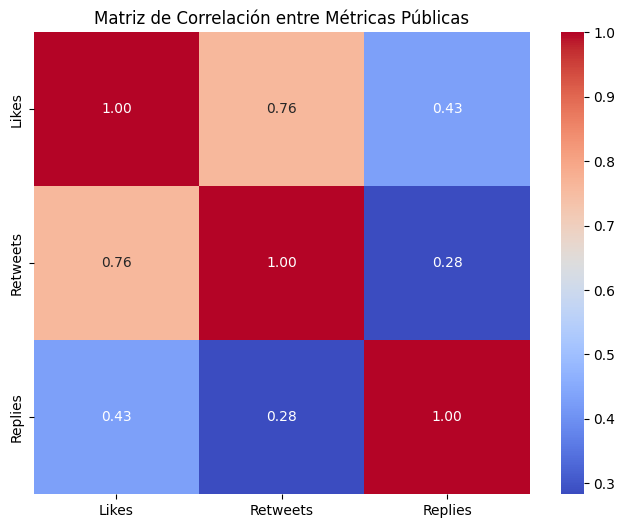

In [50]:
# Creamos un mapa de calor para la matriz de corrlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')

# Añadimos título y ajustes
plt.title("Matriz de Correlación entre Métricas Públicas")
plt.show()


Lo más resaltablde de nuestra matriz de relación es que Likes y Retweets tienen una correlación considerable. 

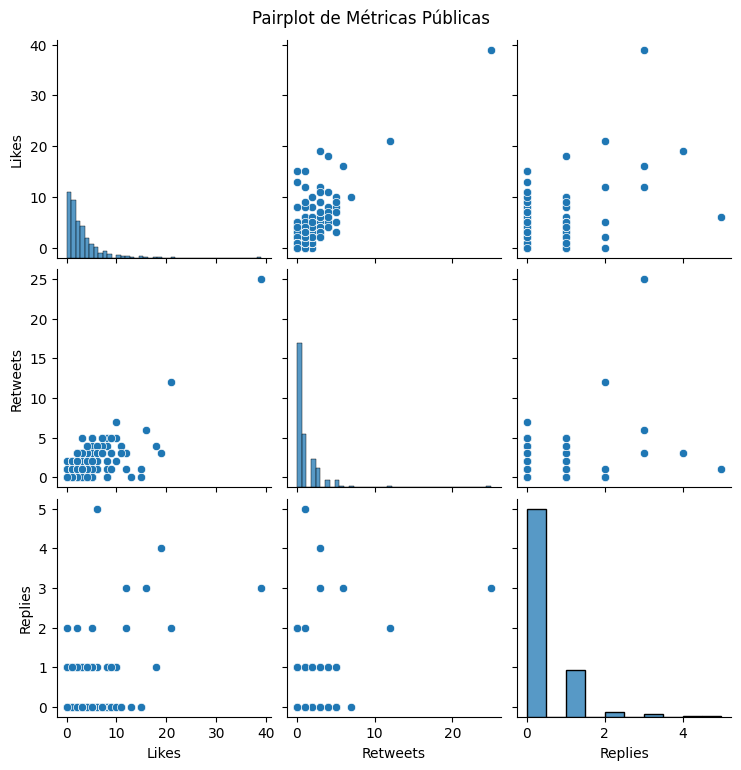

In [57]:
# Vamos a crear un pairplot
sns.pairplot(df_tweets[['Likes', 'Retweets', 'Replies']])

# Añadimos un título al gráfico
plt.suptitle('Pairplot de Métricas Públicas', y=1.02)

# Mostrar el gráfico
plt.show()

In [66]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 142
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   277 non-null    int64         
 1   Date      277 non-null    datetime64[ns]
 2   Tweet     277 non-null    object        
 3   Likes     277 non-null    int64         
 4   Retweets  277 non-null    int64         
 5   Replies   277 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 15.1+ KB


In [67]:
# Vamos a crear una linea de tiempo
# ---------------------------------
# Agrupamos por la unidad de tiempo deseada y contramos tweets
# Cambiamos 'D' a 'M' para mes, 'Y' para año, etc.
tweets_por_tiempo = df_tweets.resample('D', on='Date').size()

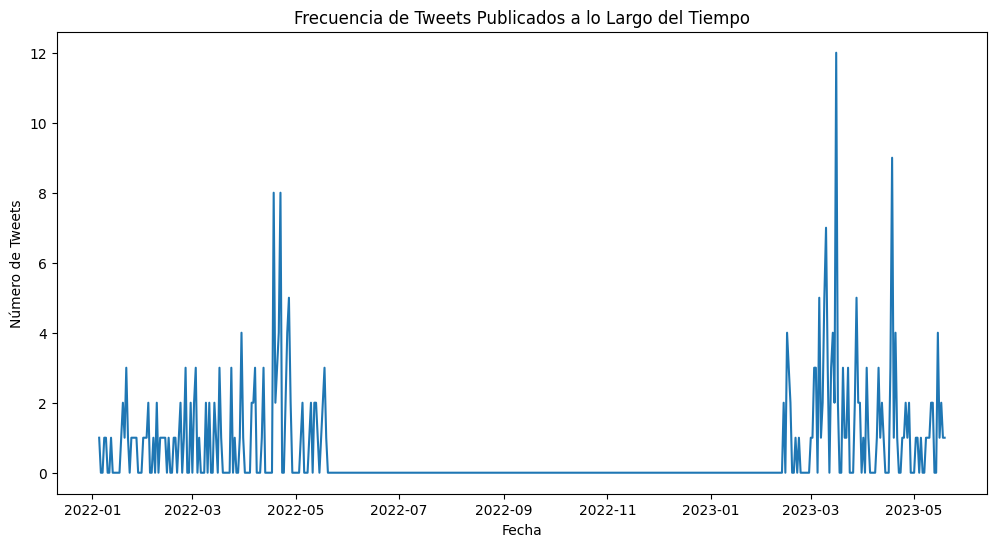

In [68]:
# Creamos gráfico de linea
plt.figure(figsize=(12, 6))
plt.plot(tweets_por_tiempo.index, tweets_por_tiempo.values)

# Añadimos título y etiquetas
plt.title('Frecuencia de Tweets Publicados a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Tweets')

plt.show()

In [75]:
# Filtramos por rango de fechas
df_2022 = df_tweets[(df_tweets['Date'] >= '2022-01-01') & (df_tweets['Date'] <= '2022-06-30')]
df_2023 = df_tweets[(df_tweets['Date'] >= '2023-01-01') & (df_tweets['Date'] <= '2023-06-30')]

# Agrupamos y contamos tweets por día
tweets_por_dia_2022 = df_2022.resample('D', on='Date').size()
tweets_por_dia_2023 = df_2023.resample('D', on='Date').size()

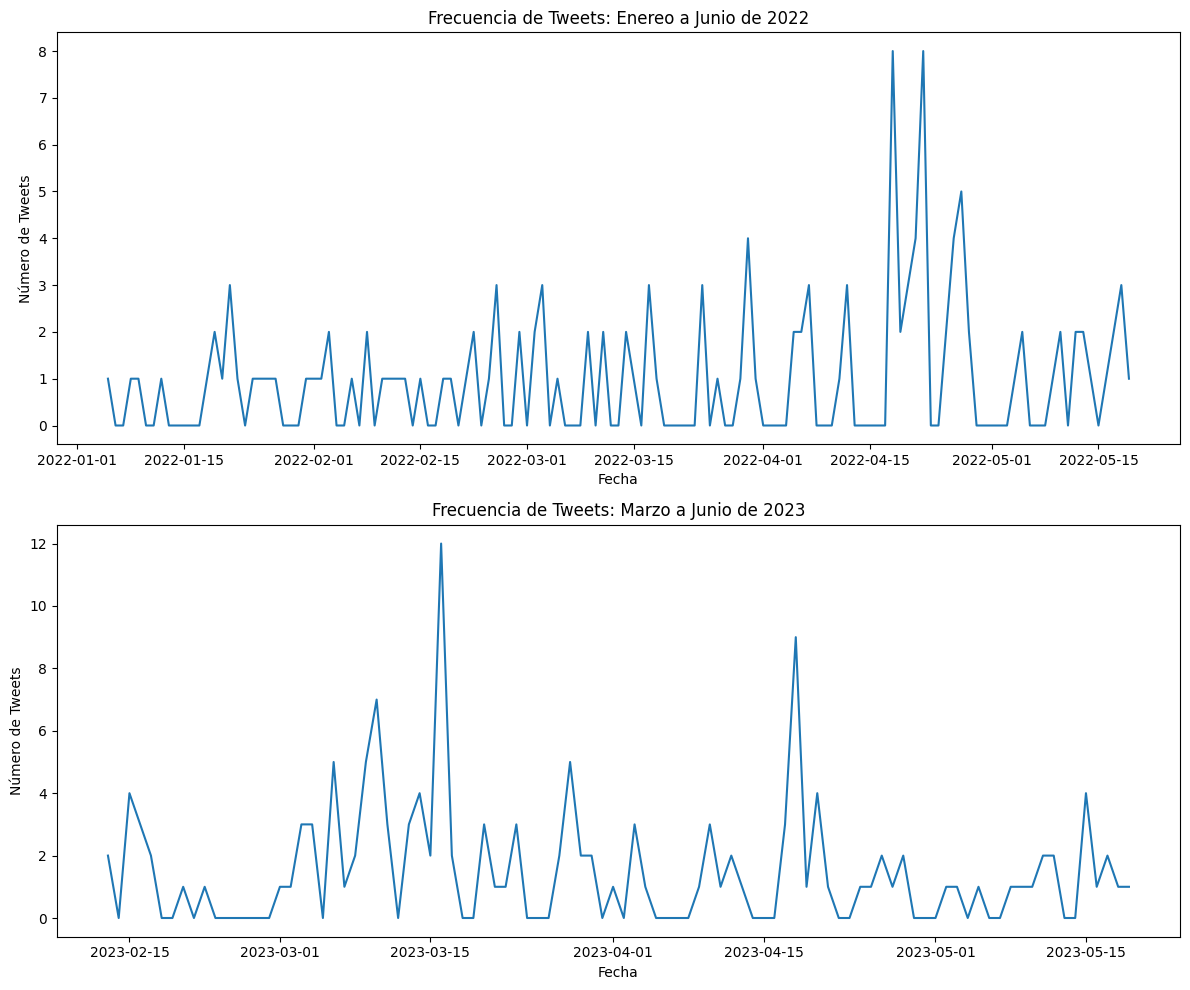

In [76]:
# Configuramos subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico para 2022
axs[0].plot(tweets_por_dia_2022.index, tweets_por_dia_2022.values)
axs[0].set_title('Frecuencia de Tweets: Enereo a Junio de 2022')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Número de Tweets')

# Gráfico para 2023
axs[1].plot(tweets_por_dia_2023.index, tweets_por_dia_2023.values)
axs[1].set_title('Frecuencia de Tweets: Marzo a Junio de 2023')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Número de Tweets')

# Mostramos gráficos
plt.tight_layout()
plt.show()

---

## ***4. Análisis de Sentimiento***

In [83]:
import joblib

try:
    modelo = joblib.load('./model/sentiment_model')
    print("Modelo cargado con joblib.")
except Exception as e:
    print("Error al cargar el modelo con joblib:", e)


Modelo cargado con joblib.


In [80]:
import pickle

with open('./model/sentiment_model', 'rb') as file:
    modelo = pickle.load(file)

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimato

##### **a. ¿Cuáles son las predicciones? Intrepreta los resultados**

In [85]:
predicciones = modelo.predict(df_tweets['Tweet'])
predicciones

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [65]:
print("Tweets Negativos (¿?)")
print('—')
print(df_tweets['Tweet'].iloc[3])
print('—')
print(df_tweets['Tweet'].iloc[5])
print('—')
print(df_tweets['Tweet'].iloc[7])
print('—')
print(df_tweets['Tweet'].iloc[8])

Tweets Negativos (¿?)
—
¿Cómo combatir el paro juvenil🥵? #tipdeldia En un país con una tasa de paro récord, hay que elegir bien dónde y qué estudiar.

Si os queréis especializar en el sector digital, os animamos a hacerlo con @TheBridge_Tech, que cuenta con un 92% de empleabilidad... ¡Y CON BECA 👇! https://t.co/2OBZSnVk7r
—
Los perfiles tecnológicos más demandados en el futuro @TheBridge_Tech https://t.co/j93jBWSLij
—
Sin desmerecer el espectáculo del 28 de mayo en Paris, el 26 a las 18:30 en Madrid, @arey presenta su #libroIC en @TheBridge_Tech Entradas aquí https://t.co/4MM6HyxTrf
—
Next week our CEO @victorianoi will be at @Thebridge_tech with @ikerarceseco to discuss the education sector 🎓 from a data-driven perspective. Join us online or at Paseo de Recoletos, 15, Madrid, to debate the challenges and opportunities the sector faces🚀 https://t.co/Vfbji4VN4b


In [98]:
df_tweets['Sentimiento'] = predicciones

In [99]:
distribucion_sentimientos = df_tweets['Sentimiento'].value_counts()
print(distribucion_sentimientos)

Sentimiento
0    155
1    122
Name: count, dtype: int64


In [100]:
df_distribucion = pd.DataFrame({'Sentimiento': distribucion_sentimientos.index,
                                'Número de Tweets': distribucion_sentimientos.values})

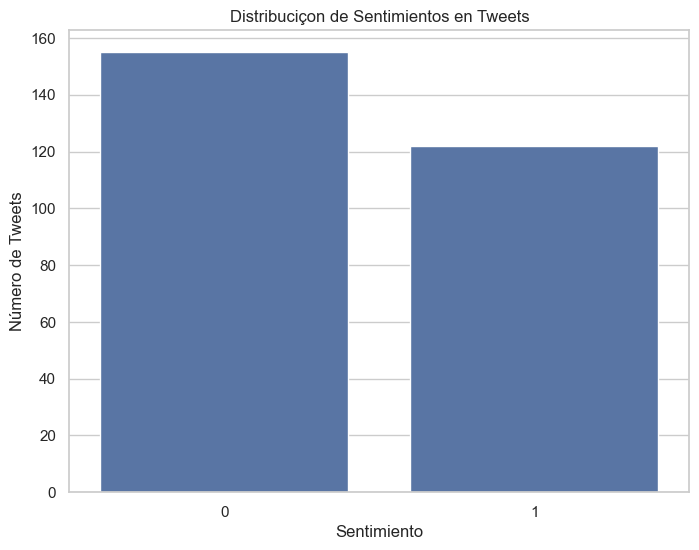

In [101]:
# Configuramos el estilo
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentimiento', y='Número de Tweets', data=df_distribucion)

# Añadimos títulos y etiquetas
plt.title('Distribuciçon de Sentimientos en Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')

plt.show()

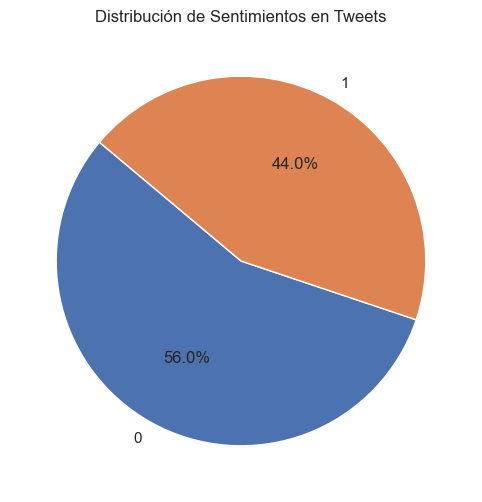

In [107]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(df_distribucion['Número de Tweets'], labels=df_distribucion['Sentimiento'], autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Distribución de Sentimientos en Tweets')

# Mostrar el gráfico
plt.show()

##### **b. ¿Cuáles son las predicciones? Intrepreta los resultados**

In [104]:
importancias = modelo.feature_importances_

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

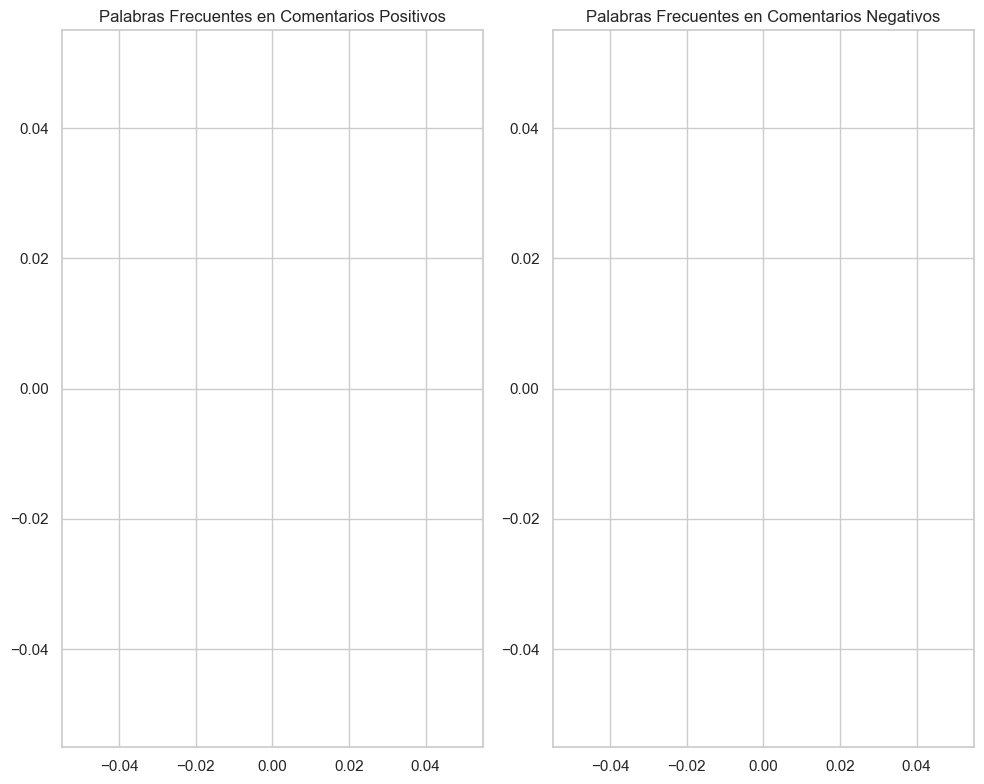

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

# Suponiendo que tienes una función generate_ngrams(sent)
# y df_tweets ya tiene una columna 'Sentimiento'

# Contar n-gramas para una categoría de sentimiento
def contar_ngramas(dataframe, sentimiento):
    freq_dict = defaultdict(int)
    for sent in dataframe[dataframe['Sentimiento'] == sentimiento]['Tweet']:
        for word in generate_ngrams(sent):
            freq_dict[word] += 1
    return pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1], columns=["word", "wordcount"])

# Ejemplo para sentimientos positivos y negativos
df_positivos = contar_ngramas(df_tweets, 'positivo')
df_negativos = contar_ngramas(df_tweets, 'negativo')

# Crear gráficos de barras horizontales
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.barh(df_positivos['word'].head(20), df_positivos['wordcount'].head(20), color='blue')
plt.title('Palabras Frecuentes en Comentarios Positivos')

plt.subplot(1, 2, 2)
plt.barh(df_negativos['word'].head(20), df_negativos['wordcount'].head(20), color='red')
plt.title('Palabras Frecuentes en Comentarios Negativos')

plt.tight_layout()
plt.show()

In [114]:
print(df_tweets.head())  # Esto te mostrará las primeras filas de tu DataFrame


   user_id                Date  \
0        1 2022-05-19 15:39:16   
1        1 2022-05-18 15:23:22   
2        1 2022-05-18 11:26:31   
3        2 2022-05-18 08:31:13   
4        1 2022-05-17 14:53:47   

                                               Tweet  Likes  Retweets  \
0  ¡Qué poco queda para el próximo 🔥Burn Monday🔥!...      0         2   
1  Esta es la historia de Isis🤗 que decidió hacer...      0         0   
2  Gracias @victorianoI y equipo por el análisis ...      0         0   
3  ¿Cómo combatir el paro juvenil🥵? #tipdeldia En...      8         4   
4  ¿Con ganas de probar si un empleo tecnológico ...      2         2   

   Replies  Sentimiento  
0        0            1  
1        0            1  
2        0            1  
3        1            0  
4        0            1  


In [115]:
def generate_ngrams(text):
    # Asumiendo que 'text' es una cadena de texto
    return text.split()

x = generate_ngrams("Hola Mundo, Era se una vez the future")

In [116]:
x

['Hola', 'Mundo,', 'Era', 'se', 'una', 'vez', 'the', 'future']

In [117]:
# Ejemplo usando la función anterior
df_prueba = contar_ngramas(df_tweets, 'positivo')  # Reemplaza 'positivo' por una etiqueta real de tu DataFrame
print(df_prueba.head(20))  # Esto te mostrará los 20 n-gramas más frecuentes en comentarios positivos


Empty DataFrame
Columns: [word, wordcount]
Index: []
